# Funding Rate Exploratory Data Analysis

This notebook provides a general overview of a crypto funding rate dataset, including distributional, temporal, and symbol-level analysis.

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

plt.rcParams["figure.figsize"] = (10, 4)


## 1. Load & Inspect Data

In [3]:
#df = pd.read_csv(r"D:\Homework\QF634\project\Data\raw_funding_rate\RESOLVUSDT_funding_rate_20200101_20251130.csv", parse_dates=["fundingDateTime"], date_parser=lambda x: pd.to_datetime(x, format="%Y-%m-%d %H:%M:%S.%f"))
df = pd.read_csv(r"D:\Homework\QF634\project\Data\raw_funding_rate\RESOLVUSDT_funding_rate_20200101_20251130.csv", parse_dates=["fundingDateTime"], date_parser=lambda x: pd.to_datetime(x, format="%Y-%m-%d %H:%M:%S.%f"))
df = df.sort_values("fundingDateTime").drop("formattedFundingDateTime",axis = 1).drop("symbol",axis = 1)
df.columns, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1105 entries, 0 to 1104
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   fundingRate      1105 non-null   float64       
 1   markPrice        1105 non-null   float64       
 2   fundingDateTime  1105 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2)
memory usage: 26.0 KB


C:\Users\timkf\AppData\Local\Temp\ipykernel_26204\2896449151.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(r"D:\Homework\QF634\project\Data\raw_funding_rate\RESOLVUSDT_funding_rate_20200101_20251130.csv", parse_dates=["fundingDateTime"], date_parser=lambda x: pd.to_datetime(x, format="%Y-%m-%d %H:%M:%S.%f"))


(Index(['fundingRate', 'markPrice', 'fundingDateTime'], dtype='object'), None)

In [4]:

print("Date range:", df["fundingDateTime"].min(), "→", df["fundingDateTime"].max())


Date range: 2025-06-10 12:00:00.005000 → 2025-11-30 09:00:00


## 3. Funding Rate Summary Statistics

In [5]:

df["fundingRate"].describe()


count    1105.000000
mean       -0.000558
std         0.001764
min        -0.020000
25%        -0.000284
50%         0.000050
75%         0.000050
max         0.000050
Name: fundingRate, dtype: float64

In [6]:

df["fundingRate"].quantile([0.001, 0.01, 0.05, 0.95, 0.99, 0.999])


0.001   -0.018374
0.010   -0.009097
0.050   -0.003175
0.950    0.000050
0.990    0.000050
0.999    0.000050
Name: fundingRate, dtype: float64

## 4. Funding Rate Distribution

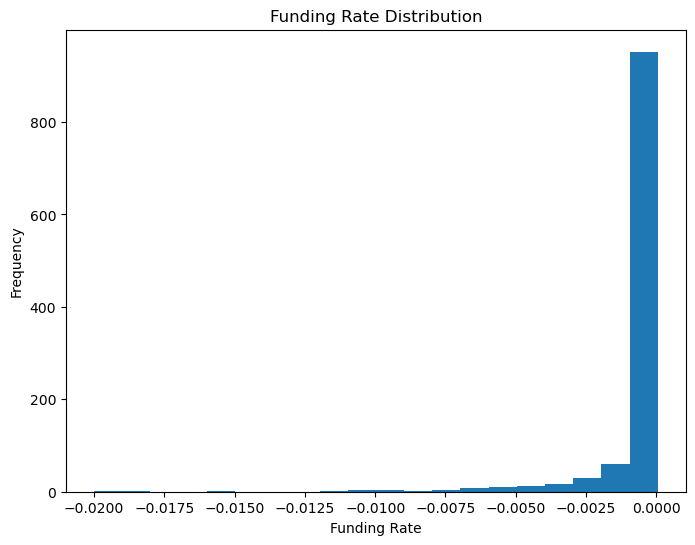

In [ ]:
plt.figure(figsize=(8, 8))
plt.hist(df["fundingRate"], bins=20)
plt.title("Funding Rate Distribution")
plt.xlabel("Funding Rate")
plt.ylabel("Frequency")
plt.show()


## 5. Funding Rate Over Time (Aggregate)

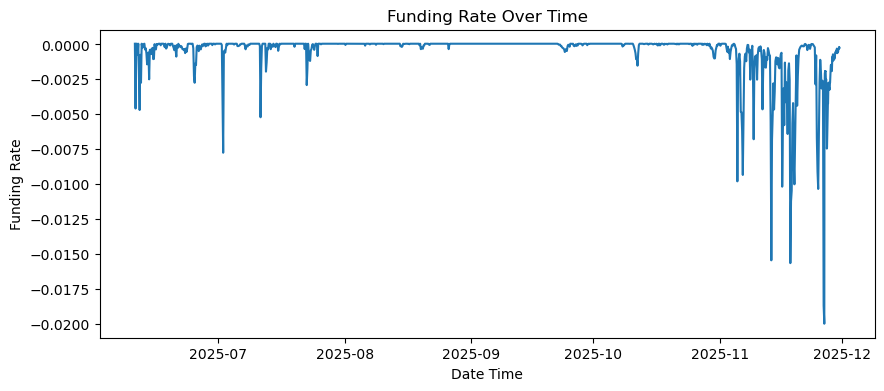

In [ ]:


df.set_index("fundingDateTime")
plt.figure(figsize=(8, 8))
plt.plot(df["fundingDateTime"], df["fundingRate"])
plt.title("Funding Rate Over Time")
plt.xlabel("Date Time")
plt.ylabel("Funding Rate")
plt.show()


## 7. Extreme Funding Rate Events (Spikes)

In [53]:

threshold = df["fundingRate"].quantile(0.90)
spikes = df[df["fundingRate"].abs() > threshold]

len(spikes), spikes.head()


(391,
    fundingRate  markPrice         fundingDateTime
 1    -0.004590   0.318353 2025-06-10 16:00:00.003
 4    -0.000756   0.314065 2025-06-11 04:00:00.006
 6    -0.002309   0.368178 2025-06-11 12:00:00.007
 7    -0.004697   0.390830 2025-06-11 16:00:00.010
 8    -0.000744   0.363578 2025-06-11 20:00:00.012)

In [54]:
df["fundingRate"].kurtosis()

np.float64(39.6423198842229)

In [55]:
df["fundingRate"].skew()

np.float64(-5.458862074060718)